# Ice:Tienda online de videojuegos

# Contents
* [1.- Introducción y Objetivos.](#objetivo)
* [2.-Importacion de los archivos](#importacion)
* [3.-Preparación de los datos](#preparación)
* [4.- Análisis de los datos](#análisis)
* [5. Perfil de usuario para cada región](#perfil)
* [6.- Prueba de hipótesis](#pruebas)
* [7.- Conclusión General](#conclusiongeneral)

# 1. Introducción y Objetivos

Ice es una tienda online de videojuegos que está presente en las regiones de: Norte América, Europa y Japón y en demás países.
El objetivo es identificar patrones de comportamiento, vida util de los videojuegos, cuáles son los videojuegos más populares, que nos permitan pronosticar si nuestros videojuegos tendrán exito comercial o no. 

Actualmente estamos en diciembre del 2016 y tenemos recopilado la base de datos con los nombres de los videojuegos, plataformas, año de lanzamiento del juego, género, ventas en millones de dólares por cada región,reseñas de los usuarios y expertos que nos permitirán realizar la planificación de las campañas publicitarias para el próximo año. 



# 2. Importación de los archivos

Importaremos las siguientes librerías

In [44]:
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene
import numpy as np
import pandas as pd
import seaborn as sns

Insertamos la ruta del archivo

In [45]:
games=pd.read_csv('/datasets/games.csv')

Vemos la información del archivo

In [46]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Mostramos las primeras 4 filas para ver los datos 

In [47]:
games.head(4)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E


* El tamaño del archivo es de 16.715 filas con 11 columnas. 
* Existen valores ausentes en 6 columnas: Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating. 
* Year_of_Release se encuentra como float, y hasta rellenar los valores ausentes se podra hacer el cambio a tipo int. 
* Los valores de las ventas se encuentran en millones de dólares por lo que dejaremos el tipo de dato como float.


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen inicio, Sara. Esto nos permitirá tener una idea más clara de los datos y de lo que podemos hacer con ellos.
</div>

# 3. Preparación de los datos

**3.1 Reemplazo de los nombres de las columnas a minúsculas**

In [48]:
columns = games.columns
games.set_axis(columns.str.lower(), axis='columns', inplace=True)


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

**3.3 Valores Ausentes**

Procederemos a calcular cuánto es el porcentaje que representan los valores ausentes.


In [49]:
games_null = games[games.isna().any(1)]

games_null_rate = len(games_null) / len(games)

print(f"El porcentaje de valores nulos es: {games_null_rate:.0%}")
print()

games_null.info()

El porcentaje de valores nulos es: 53%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8837 entries, 1 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8835 non-null   object 
 1   platform         8837 non-null   object 
 2   year_of_release  8568 non-null   float64
 3   genre            8835 non-null   object 
 4   na_sales         8837 non-null   float64
 5   eu_sales         8837 non-null   float64
 6   jp_sales         8837 non-null   float64
 7   other_sales      8837 non-null   float64
 8   critic_score     259 non-null    float64
 9   user_score       2136 non-null   object 
 10  rating           2071 non-null   object 
dtypes: float64(6), object(5)
memory usage: 828.5+ KB


El 53% del total de nuestros datos estan ausentes, es más de la mitad de la información que a continuación vamos a evaluar la posibilida de reemplazar sus valores ausentes o no ya que pueden distorcionar los datos y también por el hecho de que no tenemos forma de como saber que valor es el que debe estar.

**Year_of_Release**

Realizaremos dos gráficas de barras con sus valores ausentes para conocer cuántos videojuegos pertenecen cada género y por plataforma.

<AxesSubplot:title={'center':'Número de videojuegos por plataforma'}, xlabel='genre'>

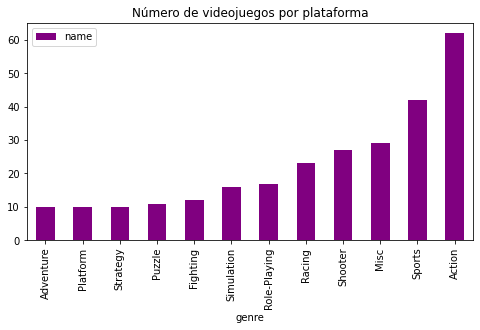

In [50]:
# Por género
year_va=games[(games['year_of_release'].isna())].pivot_table(index=['genre'],values='name',aggfunc='count').sort_values(by='name',ascending=True).plot(kind='bar', color='purple',figsize=(8,4),title='Número de videojuegos por plataforma')
year_va


<AxesSubplot:title={'center':'Número de videojuegos por plataforma'}, xlabel='platform'>

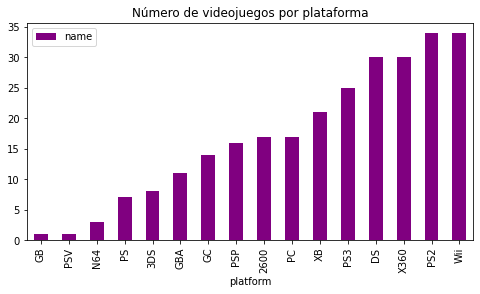

In [51]:
# Por plataforma
year_va=games[(games['year_of_release'].isna())].pivot_table(index=['platform'],values='name',aggfunc='count').sort_values(by='name',ascending=True).plot(kind='bar', color='purple',figsize=(8,4),title='Número de videojuegos por plataforma')
year_va


* En los dos gráficos encontramos una gran variedad en los valores ausentes del año del lanzamiento, sin embargo predomina más para aquellos videojuegos del género acción en las plataformas de Wii y PS2.
* Podemos llegar a una posible razón, que seguramente fueron videojuegos y plataformas muy antiguos o recién se encontraba en la etapa incial de desarrollo y descubrimiento dentro  del ciclo de vida del videojuego.
* Dado que puede haber juegos que no se repitan en el dataset y no tienen identificado el año de lanzamiento, procederemos a dejar los datos originalmente.

**User_Score**



Primero veremos que valores tenemos en esta columna.

In [52]:
games['user_score'].value_counts()


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
1.5       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Existen 2424 datos que tienen el nombre de "To be determined", que se espera en algún momento que el usuario envíe la calificación y que por el momento está pendiente, mantendremos esos valores así y a los valores ausentes lo cambiaremos por nan.


In [53]:
games['user_score']=games['user_score'].fillna('nan')
games['user_score'].head(10)

0      8
1    nan
2    8.3
3      8
4    nan
5    nan
6    8.5
7    6.6
8    8.4
9    nan
Name: user_score, dtype: object

**Critic_score**

Realizaremos una gráfica de barras con sus valores ausentes para conocer en que años se refleja una mayor ausencia en la calificación del experto y un segundo gráfico para conocer la distribución por plataformas.

<AxesSubplot:title={'center':'Número de videojuegos por año'}, xlabel='year_of_release'>

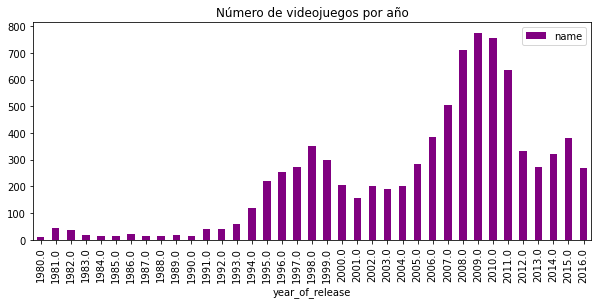

In [54]:
#Por año
critic_va=games[(games['critic_score'].isna())].pivot_table(index='year_of_release',values='name',aggfunc='count').sort_values(by='year_of_release',ascending=True).plot(kind='bar',color='purple',title= 'Número de videojuegos por año',figsize=(10,4))
critic_va
    

<AxesSubplot:title={'center':'Número de videojuegos por plataformas'}, xlabel='platform'>

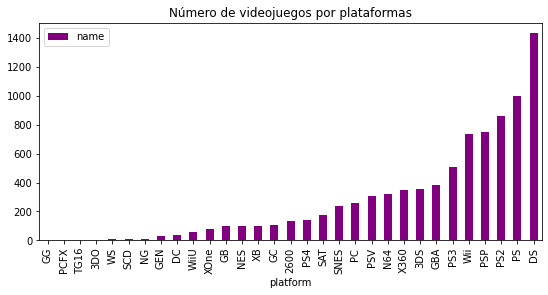

In [55]:
#Por plataforma
critic_va=games[(games['critic_score'].isna())].pivot_table(index='platform',values='name',aggfunc='count').sort_values(by='name',ascending=True).plot(kind='bar',color='purple',title= 'Número de videojuegos por plataformas',figsize=(9,4))
critic_va
    

* En el primer gráfico se observa una tendecia de picos entre 1995 a 2000 y otro en 2008 y 2011.
* En el segundo gráfico vemos que es mayor la ausencia de los puntajes para la plataforma de DS, sería interesante si más adelante observamos si corresponde a una antigua plataforma y tambien puede influir por el juego y ya no les interesa dar la calificación.
* No se reemplazarán los valores ausentes porque es una nota muy subjetivo que va a depender de cada criterio de las personas/expertos.

**Rating**



Primero mostraremos los valores no ausentes de la columna, para conocer que tipos de calificaciones hay según la Junta de clasificación de software de entretenimiento

In [56]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Tenemos 8 tipos de calificaciones, siendo las más comunes E, T, M, E10+.

Realizaremos un grafico de barras con los valores ausentes de rating para observar la distribución por plataforma.

<AxesSubplot:title={'center':'Número de videojuegos por plataforma'}, xlabel='platform'>

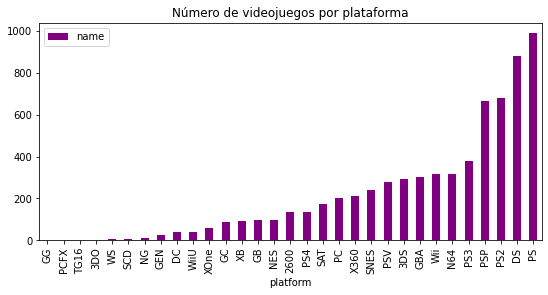

In [57]:
# Por plataforma
rating_va=games[(games['rating'].isna())].pivot_table(index='platform',values='name',aggfunc='count').sort_values(by='name',ascending=True).plot(kind='bar',color='purple', title= 'Número de videojuegos por plataforma',figsize=(9,4))
rating_va

Realizaremos otro grafico de barras con los valores ausentes de rating para observar la distribución por género del videojuego.

<AxesSubplot:title={'center':'Número de videjuegos por género'}, xlabel='genre'>

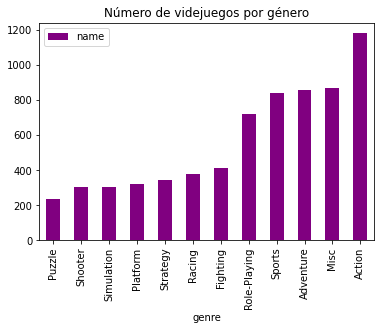

In [58]:
#Por género del videojuego
rating_va=games[(games['rating'].isna())].pivot_table(index='genre',values='name',aggfunc='count').sort_values(by='name',ascending=True).plot(kind='bar', color='purple',title='Número de videjuegos por género')
rating_va

* En el primer gráfico hay mas valores ausentes para los videojuegos de acción y para la plataforma PS, mientras las que son de puzzle son las menores. 
* El relleno de valores ausentes claramente afectará a que lleguemos a los resultados reales, por lo que trabajaremos con los datos disponibles.

**Conclusiones intermedias:**
    

* Encontramos que los valores ausentes de los años de lanzamiento estaba más relacionado a que era juegos deportivos y de acción en las platafomas de X360 Y PS2.
* Para la calificación de los expertos y de la junta sus valores ausentes son más en las plataforma PS y DS la cual se investigará más adeltante si son nuevas o antiguas.
* Se decidió que no se reemplazará los valores ausentes porque son datos que son muy subjetivos de acuerdo a la experiencia y concocimiento de expertos y la junta.
* Los años de lanzamiento no fueron rellenao, debido a que no se pueden completar con el dataset porque hay varios juegos que son únicos sin el registro de los años de lanzamiento.


**3.4 Cálculo de las ventas totales**

Calcularemos las ventas totales de todas las regiones y de los demás  países para cada juego y lo colacaremos en una nueva columna.

In [59]:
def ingresos_totales (row):
    america=row['na_sales']
    europa=row['eu_sales']
    japon=row['jp_sales']
    other=row['other_sales']
    
    return america+europa+japon+other
    

In [60]:
ingresos_totales(games.iloc[3])

32.77

In [61]:
try:
    games['ingresos_totales']=games.apply(ingresos_totales,axis=1)
except: 
    print('Error de función')

In [62]:
#Mostramos las primeras 10 filas para comprobar que se ha creado la columna
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ingresos_totales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,nan,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,nan,NaN,31.38


# 4. Análisis de los datos

**Primero queremos sabercuántos juegos fueron lanzados en diferentes años. Esto nos dará la claridad para ver como han ido evolucionando la cantidad de videojuegos a lo largo de los años.**

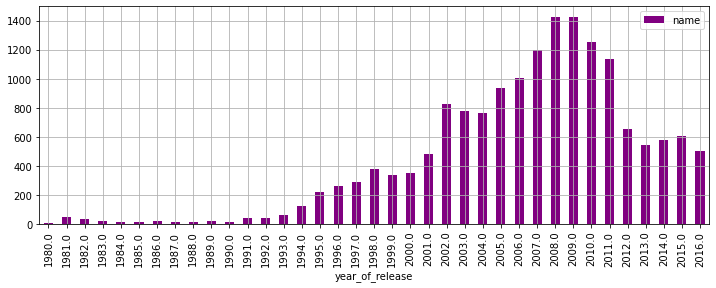

In [63]:
bar1=games.pivot_table(index='year_of_release', values='name',aggfunc='count').plot(kind='bar',color='purple',grid=True,figsize=(12,4))

* Podemos observar claramente que hemos tenido una evolución en el desarrollo e implementación de la tecnología con el pasar de los años que es proporcional al incremento que hay en el número de videojuegos lanzados.
* Nuestra base de datos incuye un periodo que va desde 1980 al 2016 donde existen picos alcanzados entre el 2008 y el 2009 llegando a los 1400 videojuegos.
* A partir del año 2012 hasta el 2016 vemos un recesión significativa llegando a un número mínimo de 600 videojuegos.  


**Oservaremos a través de un grafico de barra cómo varían las ventas de una plataforma a otra.**

<AxesSubplot:xlabel='platform'>

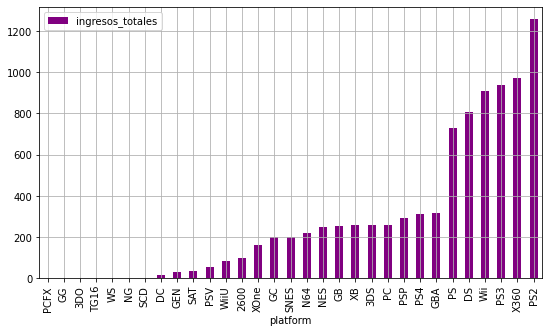

In [64]:
#¿Cómo varían las ventas de una plataforma a otra?
sales=games.pivot_table(index='platform',values='ingresos_totales', aggfunc='sum').sort_values(by='ingresos_totales',ascending=True)
sales.plot(kind='bar',color='purple', grid=True, figsize=(9,5))

* Las platafomas con mayores ventas totales registradas en millones de dólares a lo largo de los años son PS2,X360,PS3 y Wii registrando valores por encima de los 800 millones y llegando a un pico de 1200 millones para PS2.

**Para las plataformas con mayores ventas totales construiremos una distribución basada en los datos de cada año.**

In [65]:
popular=games.query('platform == ("PS2","X360","PS3","Wii")')

<AxesSubplot:title={'center':'Plataformas con mayores ingresos distribución por años'}, xlabel='year_of_release'>

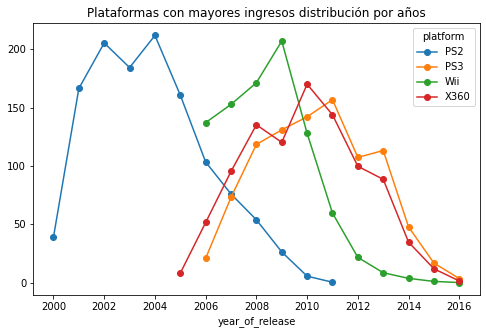

In [66]:
#Distribución basada en los datos de cada año de las plataformas con mayores ventas totales
grafico=popular.pivot_table(index='year_of_release',values='ingresos_totales',columns='platform',aggfunc='sum').plot(style='o-',title='Plataformas con mayores ingresos distribución por años',figsize=(8,5))
grafico

**PS2:** Fue la que registró mayores ventas que desde su fecha de lanzamiento hasta alcanzar su pico fueron 2 años, y 
7 años para ir decreciendo sus ingresos hasta finalmente desaparecer en el 2011.

**PS3:** Tardó 5 años desde su lanzamientoen 2006 hasta alcanzar el máximo de ingresos y  5 años en desaparecer.

**Wii:** En su lanzamieno en 2006 registró un buen nivel de ventas pero solo hasta 3 años registró su maximo valor y 3 años despúes ya sus ventas fueron por debajo de 25 millones. Despues de 10 años de su lanzamiento sus ventas ya son mínimas.

**X360:** Durante los primeros 5 años registró un pico en sus ventas y durante 4 años despúes fue decreciendo hasta llegar a 20 millones.

Las plataformas que solían ser populares pero a la fecha ya no tienen ventas o muy mínimas son las 4 identificadas.

Por lo general las plataformas tienen 5 años desde su lanzamiento hasta llegar a su pico máximo de ventas y tienen una vida útil de 10 años hasta desaparecer. 

Podemos ver que al 2016 ya no registran ventas estas plataformas, pese a que fueron las que más ventas alcanzaron en su vida útil comparado con las demás y además que sabemos que no tenemos datos completos del año 2016 puede que afecte los resultados a ver valores menores a los reales.

**Determinaremos que período nos aporta mejores insights para construir el modelo de predicción para el 2017**

Dado que desde el 2000 empieza el crecimiento en las ventas de las plataformas, filtraremos a partir de ese periodo para observar la distribución hasta el 2016.

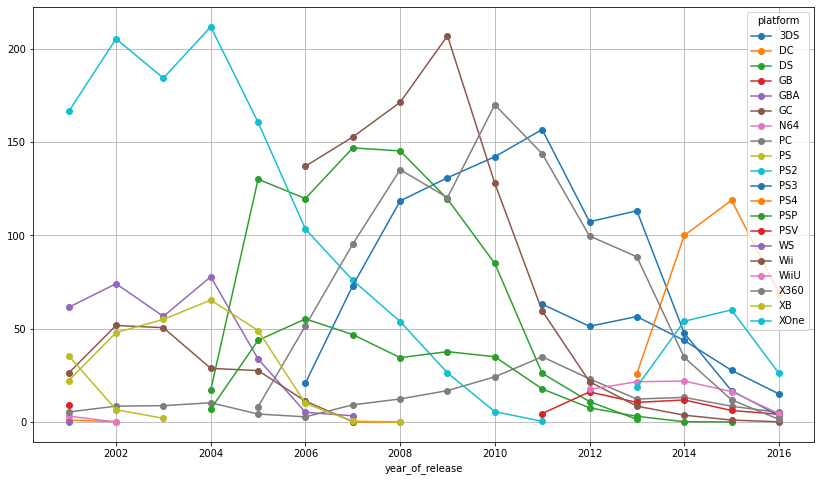

In [67]:
#Distribución de las ventas a lo largo de los años para cada plataforma.
sales=games.query('year_of_release >2000').pivot_table(index='year_of_release',values='ingresos_totales',columns='platform', aggfunc='sum').plot(style='o-', grid=True, figsize=(14,8))

In [68]:
#Top ventas en el 2015
sales=games.query('year_of_release == 2015').pivot_table(index='platform',values='ingresos_totales', aggfunc='sum').sort_values(by='ingresos_totales',ascending=True)
sales

,ingresos_totales
platform,
PSP,0.12
Wii,1.14
PSV,6.25
PC,8.52
X360,11.96
WiiU,16.35
PS3,16.82
3DS,27.78
XOne,60.14


Usamos un gráfico de puntos para visualizar la tendencia en las ventas identificado por cada color para cada plataforma.
* Como vimos en el primer gráfico de las ventas totales vs el periodo, observamos que hay un descenso a partir del 2012 y se ha mantenido esa misma tendencia hasta el 2016 de estar entre 600 y 500 millones de dólares. 
* Adicional nos dimos cuenta que la vida útil de una plataforma desde su lanzamiento es de alrededor de 8 a 10 años hasta desaparecer, y tarda 5 años en llegar a su pico máximo.
* En este último gráfico vemos como las plataformas desde su lanzamiento en el 2001 llegan a desaparecer en el 2007 como fue el caso de GBA. 
* Por estos motivos tomaremos un periodo desde el 2013 en adelante para el modelo predictivo del próximo año. 
* Adicional observamos en esta tabla que las que registran mayores ventas en el 2015 son PS4, XOne, 3DS y PS3.

**Queremos saber cuales son las plataformas líderes en ventas, que son potencialmente rentables e identificar cuáles crecen y cuáles se reducen.**

Como escogimos ya nuestro periodo de análisis que será desde el 2013 en adelante, realizaremos un gráfico para identificar que plataformas son las líderes de ventas, cuando fue su lanzamiento, obsevar su tendencia de ventas como sus ventas promedio.
Con estos parámetros establecidos podremos a escoger cuáles son las plataformas potencialente rentables para el 2017.

<AxesSubplot:xlabel='year_of_release'>

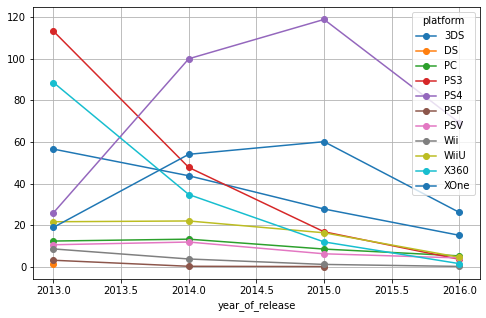

In [69]:
#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?
sales=games.query('year_of_release >=2013').pivot_table(index='year_of_release',values='ingresos_totales',columns='platform', aggfunc='sum').plot(style='o-', grid=True, figsize=(8,5))
sales

* Las plataformas que llevan la delantera en el total de sus ventas son PS4, XOne y 3DS vendiendo por encima de 18 millones en el 2016, pese a que tiene información incompleta en ese año.
* Para PS4 y XOne podemos ver que desde su fecha de lanzamiento fue en el 2013 por lo que se espera que su pico de ventas sea en el 2017, ya que todavía se encuentra en el periodo de crecimiento hasta llegar a la madurez el próximo año.
* Por otro lado la plataforma 3DS fue lanzada en el 2011 por lo que se espera que al culminar este año 106 sus ventas alcancen un pico.
* Es muy notorio que para la plataforma PS3 alcanzó el pico en el 2013 pero para el 2014 bajó considerablemente por el lanzamiento de la PS4 debido a que era la última versión con mejores avances, tecnología, etc y llegando a desaparecer completamente para el 2015.
* Resumiendo hemos identificado a 2 plataformas con mayor potencial y rentabilidad para el próximo año que es la PS4, XOne y 3DS.

**Crearemos un diagrama de caja para las ventas globales de todos los juegos, desglosados por las 3 plataformas con mayores ingresos en el 2015**

In [70]:
#Guardaremos nuestro dataframe sin valores ausentes dentro de otra variable que tendrá el periodo de análisis que nos interesa.
games_2013=games.query('year_of_release >=2013').reset_index(drop=True)


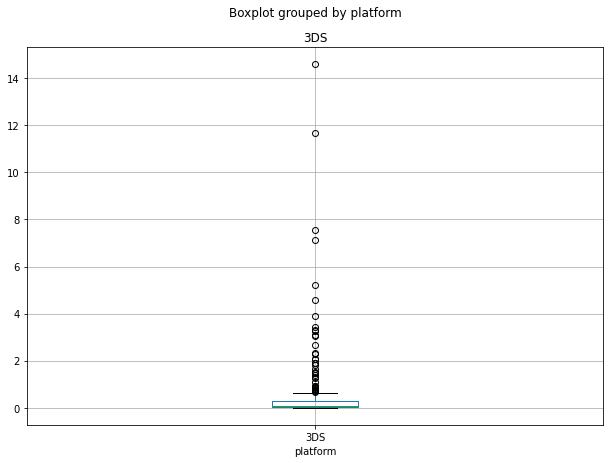

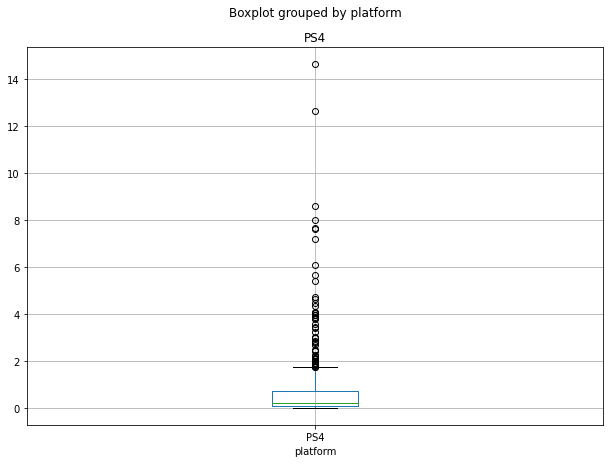

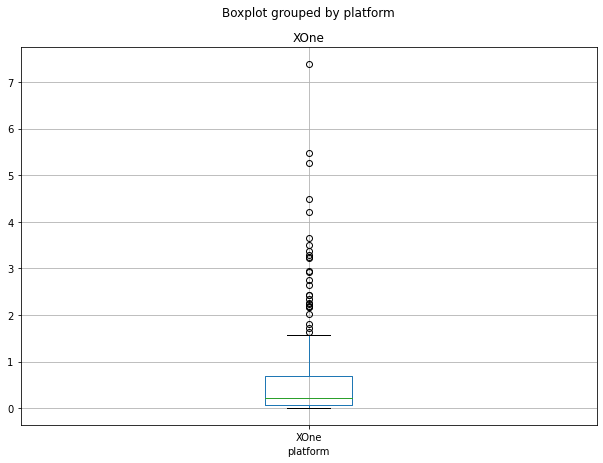

In [71]:
#Diagrama de caja para PS4,XOne y PC
sales_per_game= games_2013.query('platform== ("PS4","XOne","3DS")').pivot_table(index='platform',values='ingresos_totales')
for plataforma, datos in games_2013.query('platform== ("PS4","XOne","3DS")').groupby("platform"):
    datos.boxplot(by='platform', column='ingresos_totales',figsize=(10,7))
    plt.title(plataforma)
    plt.show()

* El ingreso promedio por los videojuegos para las 3 plataformas no tienen una diferencia significativa podríamos decir deacuerdo a las gráficas están por debajo de 1 millón.
* La PS4 registra mayores valores atípicos en la venta de posibles videojuegos que sean más caros llegando a un valor máximo de más de 14 millones.
* El valor de ingreso por videojuegos máximo para XOne es 7.5 y para 3DS es 14.5. 


**Reseñas de los usuarios y profesionales Vs las ventas de la plataforma.**

En esta ocasión queremos ver que correlación existe entre las reseñas de los usuarios y los profesionales sobre las ventas de la plataforma de PS4 que fue la que identificamos que tiene mayores ventas registradas para nuestro periodo de análisis.

* User_score y Critic_score vs Ingresos totales


In [82]:
#utillizamos el segmentador para no tomar en cuenta a los valores nan y tbd y cambiamos el tipo de dato a float
games_2013=games_2013.query('user_score !=("nan","tbd")').reset_index(drop=True)
games_2013['user_score']=games_2013['user_score'].astype(float)
games_2013['user_score'].head(10)

0    8.2
1    8.1
2    8.3
3    2.6
4    2.6
5    4.3
6    5.7
7    5.0
8    6.5
9    9.1
Name: user_score, dtype: float64

<AxesSubplot:>

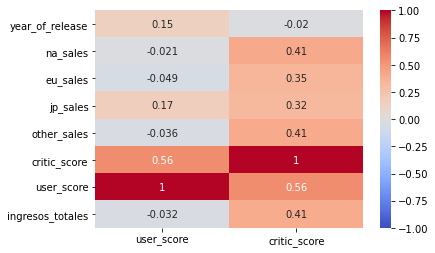

In [86]:
#Heatmap para el análisis de correlación 

sns.heatmap(games_2013.query('platform == "PS4"').corr()[['user_score','critic_score']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

* A través del mapa de calor observamos que la correlación es más fuerte entre la crítica del experto que pueden impactar para bien o mal en los ingresos totales de la empresa porque su correlación positiva es más fuerte con 0.41. Es decir que es un punto que tenemos que evaluar con el equipo y asegurarnos que para futuras calificaciones va a ser un inlfuyente en la rentabilidad.


* Se puede concluir que la calificación que otorge el usuario no va a influir en los ingresos porque su correlación es muy pequeña y negativa de -0.032, de esta manera descartamos que esta variable tenga un alto impacto en la rentabilidad.


**Comparación ventas por plataformas**

Teniendo en cuenta las conclusiones a las que hemos llegado hasta ahora, compararemos las ventas en las plataformas que identificamos desde el 2013 en adelante.


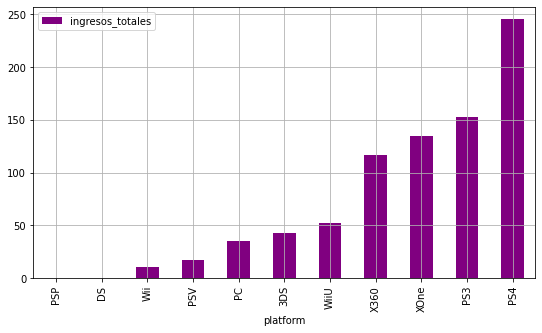

In [87]:
#Comparación de las ventas en otras plataformas.
graph3=games_2013.pivot_table(index='platform',values='ingresos_totales', aggfunc='sum').sort_values(by='ingresos_totales',ascending=True).plot(kind='bar',color='purple', grid=True, figsize=(9,5))

* La PS4 es la plataforma más popular y preferible por los usuarios para jugar los videojuegos y del punto de vista del neogcio es la que representa mayor potencial en la rentabilidad alcanzando 250 millones de dólares.
* En segundo lugar se encuentra PS3 seguido de la XOne que registran ingresos por encima de 140 millones. 
* Para nuestro modelo del 2017 un videojuego tendría más éxito comercial para la plataforma de PS4, XOne y PS3 también pero en menor medida ya que como lo confirmamos anteriomente estas 2 primeras son las que se han encuentrado en la etapa de crecimiento y ya para el 2017 y 2018 llegara a su etapa de madurez y se espera que alcancé su mayor valor histórico en ingresos totales. Sin embargo para la PS3 su lanzamiento fue en el 2006 pero ya se encuentró en la etapa de recesión desde el 2013.

Compararemos las ventas de los 5 juegos con más ingresos para cada plataforma.

In [90]:
#Top 5 juegos con mas ventas en PS4
games_ps4=games_2013.query('platform== "PS4"').pivot_table(index='name',values='ingresos_totales',aggfunc='sum').sort_values(by='ingresos_totales',ascending=False)
games_ps4.head(5)

,ingresos_totales
name,
Grand Theft Auto V,12.62
FIFA 16,8.58
Call of Duty: Advanced Warfare,7.66
FIFA 17,7.60
Fallout 4,7.17


* El juego con mayores ventas es Grand Theft con ventas por encima de 10 millones.

In [91]:
#Top 5 juegos con mas ventas en XOne
games_xone=games_2013.query('platform== "XOne"').pivot_table(index='name',values='ingresos_totales',aggfunc='sum').sort_values(by='ingresos_totales',ascending=False)
games_xone.head(5)

,ingresos_totales
name,
Grand Theft Auto V,5.47
Call of Duty: Advanced Warfare,5.26
Halo 5: Guardians,4.49
Fallout 4,4.22
Assassin's Creed: Unity,3.50


* Los juegos que encontramos en común con PS4 es Grand Theft, podemos ver que ocupan el mismo ranking pero estos juegos son más rentables venderlos en la plataforma de PS4.


In [92]:
#Top 5 juegos con mas ventas en 3DS
games_3ds=games_2013.query('platform== "3DS"').pivot_table(index='name',values='ingresos_totales',aggfunc='sum').sort_values(by='ingresos_totales',ascending=False)
games_3ds.head(5)

,ingresos_totales
name,
Luigi's Mansion: Dark Moon,4.59
Monster Hunter 4 Ultimate,3.89
The Legend of Zelda: A Link Between Worlds,3.10
Animal Crossing: Happy Home Designer,3.05
The Legend of Zelda: Majora's Mask 3D,2.34


* Para la plataforma de 3DS podemos ver que en el top 5 de juegos no coincide con ninguna de las otras plataformas.
* Hay 2 juegos que son muy potenciales como Luigi's y Monster Hunter.

In [93]:
#comparación 
ps4yxone= games_ps4.merge(right=games_xone,on='name',how='left')
merge= ps4yxone.merge(right=games_3ds,on='name',how='left')
merge.head(5)

,ingresos_totales_x,ingresos_totales_y,ingresos_totales
name,,,
Grand Theft Auto V,12.62,5.47,NaN
FIFA 16,8.58,3.25,NaN
Call of Duty: Advanced Warfare,7.66,5.26,NaN
FIFA 17,7.60,2.65,NaN
Fallout 4,7.17,4.22,NaN


* En esta tabla comparativa dado que PS4 es la que tiene mayores ingresos hicimos el merge en base a los juegos del top 5 y podemos ver que para la plataforma Xone no tiene el mismo valor para el usuario que se relfeja en el impacto económico. 
* POr otro lado vemos que para 3DS son compatibles otros juegos y que son totalmente diferentes a los de PS4 y XOne. 
* A manera de conclusión los juegos mas rentables y lo que deberíamos enfocarnos en la publicidad son: 


    PS4: Grand Theft y FIFA 16	
    XOne: Grand Theft Auto V	y  Call of Duty: Advanced Warfare
    3DS: Luigi's Mansion: Dark Moon y Monster Hunter 4 Ultimate	

**Distribución de los ingresos totales por género de los videojuegos.**

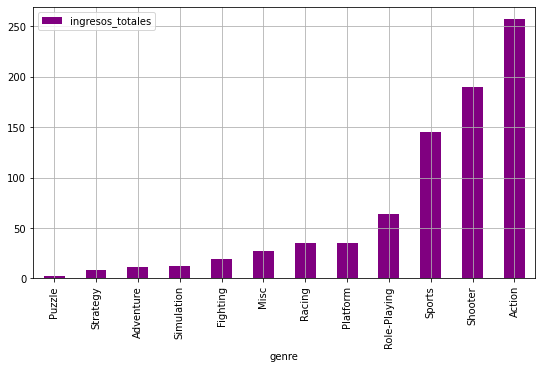

In [94]:
genero= games_2013.pivot_table(index='genre',values='ingresos_totales', aggfunc='sum').sort_values(by='ingresos_totales',ascending=True).plot(kind='bar',color='purple', grid=True, figsize=(9,5))

* El género que mayor se vende en el mercado son videojuegos de Acción, ya que es el más popular y el más atractivo para los clientes, con ingresos por encima de los 280 millones.
* De igual manera los géneros de Shooter y Sports registran ingresos entre 150 y 280 millones desde el 2013 en adelante.
* Los videojuegos de Puzzle, Strategy y Adventure son los últimos géneros que les interesa a la mayoría de los clientes, siendo los menos populares con ingresos menores a 50 millones resultando en no ser potencialmente rentables de inversión.

**Conclusiones intermedias:**

* El ciclo de crecimiento de una platafoma desde que ingresa al mercado hasta que llegue a sus ventas máximas son de 5 años, y a partir del sexto año empieza a decrecer hasta despues de 4 o 5 años en desaparecer totalmente.
* El periodo que nos va a servir para el pronóstico del próximo año se escogió desde el 2013 -2016, dado que con el punto anterior las plataformas que hayan sido lanzadas en el 2013 estarán ya muy próximas para que en el 2017 o 2018 lleguen a su pico de ventas.
* Las plataformas que identificamos que fueron lanzadas en el 2013, siendo las más populares y con mayores ingresos fueron: PS4, XOne y 3DS.
* En los diagramas de caja observamos que no existió diferencias significativas en los ingresos promedios de las 3 plataformas, encontrándose por debajo del 1 millón, pero la PS4 se encontró que tenía ingresos atípicos hasta llegar a los 14 millones, esto se puede explicar a que sean algunos videojuegos que son preferidos por los usuarios y se compensa por el volumen de unidades.
* Osbervamos que  existe una correlación muy mínima y negativa entre los ingresos y las críticas de los usuarios. 
* Para las criticas de los expertos y los ingresos hay una correlación positiva, que a medida que los videojuegos obtengan una buena puntuación por los expertos puede que aumenten los ingresos.
* Los géneros más poupulares y rentables son de Acción y Shooter. 
* En resumen para el próximo año un proyecto rentable será invertir en videojuegos de acción y shooter que sean compatibles para las plataformas de PS4,XOne, 3DS. 
* Los juegos más rentables por cada plataformas y que deberiamos enfocarnos en aumentar la publicidad son: 

     PS4: Grand Theft y FIFA 16	
    XOne: Grand Theft Auto V	y  Call of Duty: Advanced Warfare
    3DS: Luigi's Mansion: Dark Moon y Monster Hunter 4 Ultimate	

<div class="alert alert-block alert-warning">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección. Podría sugerir algunos elementos para complementarla:
    
1. Análisis por juegos relevantes.
2. Heatmaps para el análisis de correlación (seaborn es una buena opción).
3. Transformación logarítmica de las variables de calificación para observar mejor el comportamiento de las mismas.
</div>

# 5. Perfil de usuario para cada región


**Veremos la distribucion a lo largo de los años en las ventas para las 3 regiones: Norteamérica, Europa y Japon, y tambien para las ventas en otras regiones**

<AxesSubplot:title={'center':'Ingresos por regiones'}, xlabel='year_of_release'>

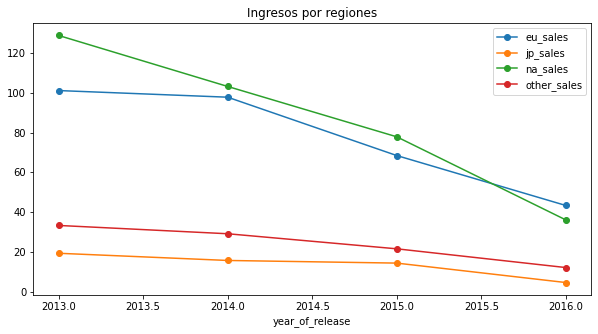

In [95]:
region_sales= games_2013.pivot_table(index='year_of_release',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum').sort_values(by='na_sales',ascending='True').plot(style='o-',title='Ingresos por regiones',figsize=(10,5))
region_sales

In [96]:
games_2013['na_sales'].sum().round()

346.0

In [97]:
games_2013['eu_sales'].sum().round()

311.0

In [98]:
games_2013['other_sales'].sum().round()

96.0

In [99]:
games_2013['jp_sales'].sum().round()

54.0

* Norteamérica es la región donde se registran las mayores ventas totales desde el 2013. 
* En segundo lugar: Europa, tercer lugar otros y en cuarto lugar Japón. 
* Ciertamente podemos ver en el gráfico que durante el transcurso hasta el 2016 vemos un decrecimiento en las ventas en todas las regiones, por lo que nos hace confirmar que no nos encontramos en una de las mejores épocas, como un complemento se debería investigar tambien cómo se encuentra la industria de videjuegos, principales competidores en cada región y observar si se trata de un comportamiento general de recesión.

**Para cada región: NorteAmérica, Europa y Japón primero se determinará las 5 plataformas principales y rentables.**

<AxesSubplot:title={'center':'Venta por plataformas para cada región'}, xlabel='platform'>

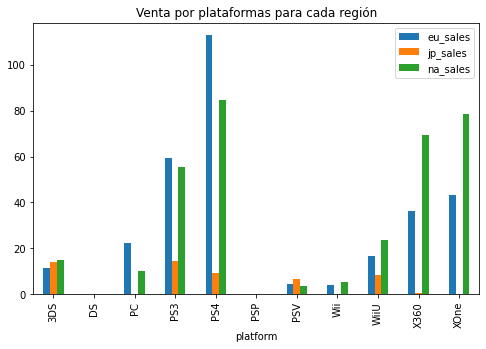

In [100]:
platform_per_region=games_2013.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').plot(kind='bar',figsize=(8,5),title='Venta por plataformas para cada región')
platform_per_region

  **Norteamérica**
* Para los clientes de esta región las ventas de PS4 y XOne son las que más ventas se registran para los videojuegos, alcanzando entre 80 y 85 millones.
* El top 5 son: PS4, XOne, X360, PS3 y 3DS.


  **Europa**
* Las plataforma que registra más ventas en esta región es PS4 con 140 millones, se ve claramente la gran diferencia con las ventas de las demás plataformas.
* El top 5 son: PS4, PS3, XOne, X360 y 3DS. 


**Japón**

* En Japón la plataforma que más rentable es la 3DS alcanzando 18 millones 
* EL top 5 son: 3DS, PS3, PSV, PS4 y WiiU.
* En esta región a diferencia de las demás es la que menor ventas registra por plataforma.

Depués de observar la gráfica con la identificación de cada región, podemos observar que los clientes van a variar el gusto y la preferencia de las plataformas dependiendo donde se encuentren geográficamente. 

Por ejemplo nos dimos cuenta que tanto clientes de Norteamérica como Europa prefieren los videojuegos en la plataforma PS4, pero en Europa se muestra más fuerte esta preferencia porque es la única que alcanza los 100 millones de dólares, mientras que en Norteamérica tambien los clientes se van por otras plataformas como XOne y X360.

Para los clientes de Japón la cuota de mercado es menor comparado con las 2 regiones. Podemos ver que en este país seguramente se debe debido a las diferentes comportamientos de los clientes como otras preferencias en las plataformas para los videojuegos. De igual manera puede ser por la competencia que existe y está mas enfocado en su cultura, o tambien porque no disponen de tanto tiempo libre para jugar. Mientras que en las otras regiones las cuotas de mercado son más rentables, en especial para Europa y Norteamerica con la PS4 que son semejantes en los gustos y preferencias de los clientes. 


**Los cinco géneros principales por cada región.**

<AxesSubplot:title={'center':'Venta por género de videojuego para cada región'}, xlabel='genre'>

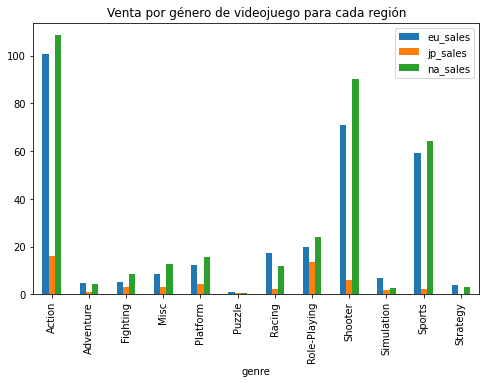

In [101]:
genre_per_region=games_2013.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').plot(kind='bar',figsize=(8,5),title='Venta por género de videojuego para cada región')
genre_per_region

**Norteamérica**
* El género de Acción y Shooter son los más vendidos, por encima de 90 millones. 
* El top 5 son: Acción, Shooter,Sports, Role-playing y PLatform. 

**Europa**
* Al igual que la anterior región, Acción y Shooter son los principales géneros llegando a los 75 - 100 millones 
* EL top 5 son: Acción, Shooter, Sports, Role-Playing y Racing. 

**Japón**
* El top 5 son : Accion,Role-Playing, Shooter, PLatform,Misc y Fighting

Por medio del gráfico podemos concluir que el género de Acción es el que predomina para todas las regiones, sin embargo la cuota de mercado para Norteamérica es la mayor con 140 millones, seguido de europa con 100 millones, y en último lugar para Japón con 18 millones.

Norteamérica y Europa comparten el mismo top 4 en los géneros, mientras que en Japón el género Role_playing es el que más prefieren y tambien se diferencia de las otras regiones porque en Japón dentro de su top 5 estan géneros como Fighting y Misc, por lo contrario estos géneros son los menos preferidos para Norteamérica y Europa. 

**Compararemos si las clasificaciones de ESRB afectan a las ventas en regiones individuales.**

Hemos investigado para tener la descripción de a que grupo etario corresponde cada clasificación

E10: Mayores a 10 años

E: Everyone 

T: Teen desde los 12 años

M : Mature entre 16 y 17 años.
    

<AxesSubplot:title={'center':'Ventas por rating para cada región'}, xlabel='rating'>

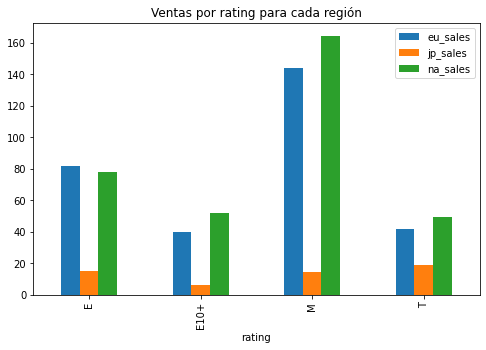

In [102]:
esrb_per_region=games_2013.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').plot(kind='bar',figsize=(8,5),title='Ventas por rating para cada región')
esrb_per_region

**Norteamérica**

* En esta región los juegos clasificados como Mature son los que predominan en las ventas alcanzando los 158 millones, y como vimos anteriormente que el género preferido es Acción, corresponde y se alinean estos 2 factores a que la mayor fuente de ingresos provenga de este grupo objetivo de personas de 16 y 18 años que prefieren dicho género.

* Los videojuegos para niños a partir de 10 años, adolescentes y para todo público son menores las ventas en gran medida que estan por debajo de los 70 millones, y se relaciona con el tercer género preferido que son los Deportes que estan dentro de estas categorías.

**Europa**
* Observamos la misma tendencia que en Norteamérica para los usuarios de Europa. 
* Esto tiene que ver a que como hemos visto anteriormente, ambas regiones comparten gustos y preferencias bastante similares, por lo que los juegos de Mature y de Acción son también la principal fuente de ingreso en Europa. 


**Japón**
* En Japón la clasificación representa en mayores ingresos para el grupo de adolescentes, todo público y mature principalmente ya que registran ingresos en un rango de 15 a 18 millones. 
* Podemos concluir con los gráficos de la sección anterior que los adolescentes y el público en general juegan más videojuegos de acción y de role-playing. 
* Los juegos de niños de 10 años en adelante son los que menores ingresos representan por debajo de 10 millones.


**Compararemos los juegos más populares por región.**

In [103]:
#norteamerica
games_per_region=games_2013.pivot_table(index='name',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
games_per_region.head(5)


,na_sales
name,
Grand Theft Auto V,23.84
Call of Duty: Ghosts,14.71
Call of Duty: Advanced Warfare,10.51
Destiny,6.62
Battlefield 4,6.44


In [104]:
#europa
games_per_region=games_2013.pivot_table(index='name',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
games_per_region.head(5)


,eu_sales
name,
Grand Theft Auto V,23.42
FIFA 15,12.02
FIFA 16,11.09
FIFA 14,10.74
FIFA 17,8.74


In [105]:
#japón
games_per_region=games_2013.pivot_table(index='name',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
games_per_region.head(5)


,jp_sales
name,
Monster Hunter 4 Ultimate,2.62
Splatoon,1.46
Grand Theft Auto V,1.42
Animal Crossing: Happy Home Designer,1.40
Mario Kart 8,1.28


* Para Norteamérica y Europa dentro del top 5 de juegos mas populares comparte a 2 juegos en común:Grand Theft que registran ventas muy similares de 23 millones cada región.
* Evaluamos que en Europa les jugsta más los juegos de fútbol porque se encuentran desde FIFA14-17 por encima de los 8 millones, mientras que en las otras 2 regiones no son muy preferidas.
* En Japón podemos ver que son juegos únicos y diferentes que de las otras regiones, Monster Hunter Y el líder de videojuegos con un tope de 2.62 millones.

**Conclusiones intermedias:**
    

* Para la región de Norteamérica y Europa los usuarios tienen muy similares preferencias y comportamiento de consumo de los videojuegos. Por ejemplo sus preferencias en los géneros tienen el mismo top 4: acción, shooter, sports y role-playing. En cuánto a las plataformas la PS4 es la que predomina en ambas regiones y adicional las ventas vs la clasificación del grupo etario son mayores para mature lo que complementa a que sea este el grupo objetivo que más rentabilidad representa.


* Por otro lado los usuarios de Japón tienen diferencias en cuánto a su preferencia en la plataforma para jugar sus videojuegos siendo la preferible 3DS que es la que genera mayores ingresos. Mientras que  si analizamos su género preferido comparten una similitud con las 2 regiones y es la de acción, y en cuanto a las clasificaciones de edad en Japón el grupo objetivo que es más rentable son los adolescentes. 


* Finalmente para nuestro proyecto que implementaremos el próximo año debemos hacerlo personalizado por cada región de acuerdo a los patrones de preferencias de los usuarios y que se relacionan en el mayor nivel de ingresos que hemos recibido, los perfiles son: 

**Juegos y plataformas más relevantes en cada región**

**Norteamérica:** Enfocarnos en videojuegos de acción y shooter como: Grand Theft Auto V, Call of Duty: Ghos,Call of Duty: Advanced Warfare	, Destiny	 y Battlefield 4	, disponibles en las plataformas de PS4 y Xone, X360, PS3 y 3DS, dirigido a un grupo objetivo de mature.
 
 
**Europa:** Inversión en videojuegos de acción y shooter como: Grand Theft Auto V, FIFA 15, FIFA 16,	FIFA 14, FIFA 17, disponibles en la plataformas PS4, PS3, XOne, X360 y 3DS dirigido aun grupo objetivo de mature.
  
  
**Japón:** Desarrollo de videojuegos de role-playing y acción  como:Monster Hunter 4 Ultimate,Splatoon,Grand Theft Auto V	, Animal Crossing: Happy Home Designer,Mario Kart 8	que esten disponible en las plataformas 3DS, PS3, PSV, PS4 y WiiU, para un grupo objetivo de adolescentes.

# 6. Prueba de hipótesis

**4.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**


Para las pruebas de las dos hipótesis utilizaremos las pruebas de igualdad de varianza de Levene la cual prueba que las muestras provienen de las poblaciones con iguales varianzas. Por lo que formulamos la hipótesis alternativa igual a lo que queremos comprobar que es cierto, es decir los usuarios para las plataformas de XboxOne y PC son las mismas y  la hipóteis nula lo contrario.

Estableceremos el nivel de significancia en 0.05 para comprobarlo con el valor p que obtengamos del método.

* H₀= Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
* H₁ = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [106]:
#Lista de las calificaciones del usuario para XOne
df_xbox_user_score= games_2013.query('platform== "XOne"')
df_xbox_user_score1= df_xbox_user_score['user_score']
df_xbox_user_score1

14      7.9
16      5.4
19      6.4
26      6.2
41      4.1
       ... 
1182    6.8
1184    6.0
1186    8.2
1187    6.6
1190    6.7
Name: user_score, Length: 182, dtype: float64

In [107]:
#Lista de las calificaciones del usuario para PC
df_pc_user_score= games_2013.query('platform== "PC"')
df_pc_user_score1= df_pc_user_score['user_score']
df_pc_user_score1

56      3.9
123     7.9
145     2.2
156     6.0
166     5.4
       ... 
1169    8.3
1171    6.8
1176    7.9
1178    1.4
1191    7.6
Name: user_score, Length: 155, dtype: float64

In [108]:
#Método de Levene 
stat, p = levene(df_xbox_user_score1, df_pc_user_score1)

print('p-value:', p)

if p < 0.05:
    print('Rechaza la igualdad de varianzas')
if p > 0.05:
    print('No se rechaza la igualdad de varianzas')


p-value: 0.003897553110130418
Rechaza la igualdad de varianzas


In [109]:
[np.var(x, ddof=1) for x in [df_xbox_user_score1, df_pc_user_score1]]

[1.9069968429360695, 3.035892752408882]

In [110]:
#Promedios de las 2 listas
print('Promedios:')
print('Promedio del Dataframe de Xbox One:', df_xbox_user_score1.mean())
print('Promedio del Dataframe de PC:', df_pc_user_score1.mean())

Promedios:
Promedio del Dataframe de Xbox One: 6.521428571428572
Promedio del Dataframe de PC: 6.2696774193548395


In [111]:
#Prueba de las medias
alpha= 0.05
results= st.ttest_ind(df_xbox_user_score1, df_pc_user_score1, equal_var = True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.14012658403611647
No rechazamos la hipótesis nula


* A través del método de Levene, el valor p indica que al ser de 0.03% y ser menor que el nivel de significancia se debe rechazar la igualdad de varianzas y se concluye que si hay diferencias entre las variaciones de la población como podemos ver los resultados de 1.90 y 3.03

* En las pruebas de las medias el valor p es mayor al nivel de significancia por lo tanto no se rechaza la hipotesis nula acerca de que los promedios de los usuarios para las plataformas XOne y PC son diferentes.


**4.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

* H₀= Las calificaciones promedio de los usuarios para los género de acción y deportes son diferentes.
* H₁ = Las calificaciones promedio de los usuarios para los género de acción y deportes son iguales.

In [112]:
#Lista de las calificaciones del usuario para acción
df_accion_user_score= games_2013.query('genre== "Action"')
df_accion_user_score1=df_accion_user_score['user_score']
df_accion_user_score1

0       8.2
1       8.1
2       8.3
12      9.1
14      7.9
       ... 
1184    6.0
1188    8.5
1189    5.1
1190    6.7
1191    7.6
Name: user_score, Length: 389, dtype: float64

In [113]:
#Lista de las calificaciones del usuario para deportes
df_deportes_user_score=games_2013.query('genre== "Sports"')
df_deportes_user_score1=df_deportes_user_score['user_score']
df_deportes_user_score1

5       4.3
7       5.0
10      4.3
11      5.7
25      4.5
       ... 
1149    8.8
1151    6.9
1167    4.5
1178    1.4
1187    6.6
Name: user_score, Length: 160, dtype: float64

In [114]:
#Método de Levene
stat, p = levene(df_accion_user_score1, df_deportes_user_score1)

print('p-value:', p)

if p < 0.05:
    print('Rechaza la igualdad de varianzas')
if p > 0.05:
    print('No se rechaza la igualdad de varianzas')


p-value: 4.2566688218274047e-07
Rechaza la igualdad de varianzas


In [115]:
[np.var(x, ddof=1) for x in [df_accion_user_score1, df_deportes_user_score1]]

[1.7693609042482705, 3.180612814465409]

In [116]:
#Promedios de las 2 listas
print('Promedios:')
print('Promedio de videojuegos de acción:', df_accion_user_score1.mean())
print('Promedio de videojuegos de deportes:', df_deportes_user_score1.mean())

Promedios:
Promedio de videojuegos de acción: 6.837532133676092
Promedio de videojuegos de deportes: 5.238124999999999


In [117]:
#Prueba de las medias
alpha= 0.05
results= st.ttest_ind(df_accion_user_score1, df_deportes_user_score1, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.4460039700704315e-20
Rechazamos la hipótesis nula


* A través del método de Levene, el valor p indica que al ser menor que el nivel de significancia se debe rechazar que las varianzas poblacionales son iguales y se concluye que si hay diferencias entre las variaciones de la población como podemos ver los resultados de 1.76 y 3.18

* En la prueba de medias el valor p es menor al nivel de significancia por lo tanto se rechaza la hipótesis de que las calificaciones promedio de los usuarios para los género de acción y deportes sean diferentes.




# 7. Conclusión General

**1) Modelo para el 2017**

* En el análisis de las plataformas más rentables desde el 2013 en adelante encontramos que de manera general la empresa obtuvo mayores ingresos en los videojuegos para las plataformas PS4, XOne y3DS dado que la vida útil son de 5 años hasta llegar a su madurez ya que su lanzamiento fue en el 2013, pero a pesar de que 3DS fue lanzado en el 2011 es una plataforma con potencial para Japón.


* Para estas 3 plataformas encontramos que tienen valores atípicos en sus ingresos máximos y se puede deber a que sean específicamente juegos del género de acción y shooter ya que son los más rentables y preferidos para los usuarios y que los valores altos se reflejen por el volumen en las cantidades compradas. 


* Analizamos que esos valores atípicos en los ingresos máximos para la plataforma PS4 y Xone el juego más popular fue: Call of Duty: Black Ops 3, y para la 3DS fue Pokemon X/Pokemon.


* La calificación del experto en nuestros videojuegos tiene un correlación medianamente que impacta al nivel de ingresos, es por eso que también se debería reforzar la importancia de este puntaje en cuánto a la calidad del producto.


* A nivel regional osbervamos que Norteamerica registra los mayores niveles de ingreso, por lo que deberíamos invertir especialmente en videojuegos de género acción y shooter como: Grand Theft Auto V, Call of Duty: Ghos,Call of Duty: Advanced Warfare	, Destiny	 y Battlefield 4, disponibles en las plataformas de PS4 y Xone, X360, PS3 y 3DS, dirigido a un grupo objetivo de mature.


* Para Europa se encuentra en el segundo lugar en el nivel de ingresos, las campañas publicitarias deberían enfocarse en videojuegos de género acción y shooter como: Grand Theft Auto V, FIFA 15, FIFA 16,	FIFA 14, FIFA 17 disponibles en la plataformas PS4, PS3, XOne, X360 y 3DS dirigido aun grupo objetivo de mature.


* Japón en la región que registra menores ingresos, es un país que representa un reto comercial y estratégico para potencializar las ventas  ya que vimos que existen diferencias en las preferencias con las otras regiones en cuanto a los juegos, plataformas y géneros.  Se debería invertir en videojuegos de role-playing y acción  como:Monster Hunter 4 Ultimate,Splatoon,Grand Theft Auto V	, Animal Crossing: Happy Home Designer,Mario Kart 8, que esten disponible en las plataformas 3DS, PS3, PSV, PS4 y WiiU, para un grupo objetivo de adolescentes.


**2) Hipótesis:** Empleamos el método de las pruebas de las medias y el de Levene para las varianzas

* No se rechaza la hipótesis que el promedio de la calificación de los usuarios para XboxOne y PC sean diferentes, dado la probabilidad de que nuestra estimación coincida con la hipótesis nula fue del 14%.

* La hipótesis que el promedio de la calificación de los usuarios para el género de acción y deportes son diferentes fue rechazada porque su probabilidad fue menor al nivel de significancia.


<div class="alert alert-block alert-danger">
    
# Comentarios generales
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, Sara. Es necesario corregir la manipulación y limpieza de datos inicial para después corregir lo sugerido en las secciones posteriores. Ten en cuenta que, dado que la eliminación de datos fue grande, las conclusiones y las valores que las sustentan cambiarán.
    
Si tienes dudas, puedes escribir por este medio o consultar con tus tutores.
    
PD.: la selección de los años es correcta.
</div>

<div class="alert alert-block alert-warning">
    
# Comentarios generales 2
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, Sara. Nos quedan dos detalles relacionados con las pruebas de hipótesis y el proyecto será aprobado.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales 3
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, Sara. Ha sido corregido satisfactoriamente el problema de la prueba de hipótesis pero aún conservas un problema con la variable user_score. Al rellenar con cero, el cálculo de la media en las pruebas de hipótesis va a desviarse mucho de la realidad. Lo mejor es dejar los valores faltantes como `nan` sin importar el tipo de dato. Al final será más robusta la prueba de hipótesis.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales 4
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Gran trabajo, Sara! Has aprobado tu proyecto integrado y concluido el primer módulo satisfactoriamente.
    
¡Felicitaciones!
</div>